In [2]:
from osgeo import gdal
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [25]:
ds = gdal.Open("2010.crop_flood_K_dur_SVM.tif")
#ds = gdal.Open("2009.crop_flood_K_dur.tif")
flood_array = ds.ReadAsArray()

ds = gdal.Open("Pak_crop.2009.kharif_avg_evi_value.tif")
evi_array = ds.ReadAsArray()

ds = gdal.Open("Pak_cropclass_2009.tif")
crop_array = ds.ReadAsArray()

ds = gdal.Open("Pakistan_county_mask.tif")
county_array = ds.ReadAsArray()

In [26]:
#df = pd.read_csv("pakistan_cropped area.csv")
df = pd.read_csv("pakistan_cropped area.csv",  header=None, skiprows=1) 
ids = df[0].values

In [127]:
ids

array([  1,   2,   3,   4,   5,   7,   8,  21,  23,  28,  38,  41,  43,
        45,  46,  47,  48,  49,  50,  52,  54,  57,  58,  59,  62,  65,
        66,  67,  68,  69,  70,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141])

In [29]:
j=130
county="Larkana"
cl = 5
if cl==0:
    crop = "Soybean"
elif cl==1:
    crop = "Maize"
elif cl==5:
    crop="Rice"
else:
    crop="cotton"
AEVI=[]
dur=[]
for i in range(1,244):
    
    #flood_mask = flood_array[np.where((county_array == j) & (crop_array == cl) & (flood_array == ))]
    evi_mask = evi_array[np.where((county_array == j) & (crop_array == cl) & (flood_array == i))]
    AEVI.append((evi_mask.sum()/evi_mask.shape)[0]/10000)
    dur.append(i)
    

In [57]:
evi_mask.shape

(18803,)

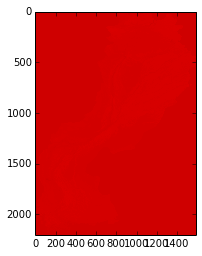

In [68]:
from matplotlib import colors
#cmap = colors.ListedColormap(['white'])
#plt.imshow(evi_array, cmap=cmap)
plt.imshow(evi_array)
plt.hot()

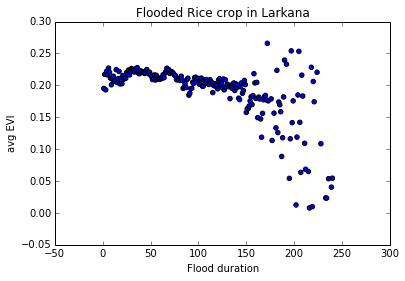

In [30]:
plt.scatter(dur,AEVI)
plt.ylabel('avg EVI')
plt.xlabel('Flood duration')
plt.title("Flooded %s crop in %s" %(crop, county))
#plt.savefig("2010.%s.%s.png" %(crop, county))

In [22]:
#flood_sum = np.array([], dtype=np.float)
#evi_sum = np.array([], dtype=np.float)
cl=1
TFlood=[] # total flood area
TEVI=[]  # total EVI area
TFEVI=[]  # total flood area EVI


F5=[]  #5 rice
F6=[]  #6 cotton
F1=[]  #1  mazie
F0=[]  #0  soybean

#Total crop EVI
E5=[]
E6=[]
E1=[]
E0=[]
#Total flooded crop EVI
EF5=[]
EF6=[]
EF1=[]
EF0=[]

j = ids[0]

for j in ids:
    flood_mask = flood_array[np.where((county_array == j) & (flood_array > 3))]
    evi_mask = evi_array[np.where((county_array == j) & (flood_array > 3))]
    Evi_mask = evi_array[np.where((county_array == j))]
    
    TFlood.append(flood_mask.shape[0] * 31.0249)  #pixelsize (557*557/10000) hectare
    TFEVI.append((evi_mask.sum()/evi_mask.shape)[0]/10000)
    TEVI.append((Evi_mask.sum()/Evi_mask.shape)[0]/10000)
    
    for i in [0,1,5,6]:
        flood_mask = flood_array[np.where((county_array == j) & (crop_array == i) & (flood_array > 3))]
        evi_mask = evi_array[np.where((county_array == j) & (crop_array == i) & (flood_array > 3))]
        Evi_mask = evi_array[np.where((county_array == j) & (crop_array == i))]
        if i == 0:
            F0.append(flood_mask.shape[0]* 31.0249)
            EF0.append((evi_mask.sum()/evi_mask.shape)[0]/10000)
            E0.append((Evi_mask.sum()/Evi_mask.shape)[0]/10000)
        elif i == 1:
            F1.append(flood_mask.shape[0]* 31.0249)
            EF1.append((evi_mask.sum()/evi_mask.shape)[0]/10000)
            E1.append((Evi_mask.sum()/Evi_mask.shape)[0]/10000)     
        elif i == 5:
            F5.append(flood_mask.shape[0]* 31.0249)
            EF5.append((evi_mask.sum()/evi_mask.shape)[0]/10000)
            E5.append((Evi_mask.sum()/Evi_mask.shape)[0]/10000)
        else:
            F6.append(flood_mask.shape[0]* 31.0249)
            EF6.append((evi_mask.sum()/evi_mask.shape)[0]/10000)
            E6.append((Evi_mask.sum()/Evi_mask.shape)[0]/10000)

df[2] = TFlood # total flood area
df[3] = F5  #5 rice
df[4] = F6  #6 cotton
df[5] = F1  #1  mazie
df[6] = F0#0  soybean


df[7] = TEVI  # total EVI area
df[8] =TFEVI # total flood area EVI
#Total crop EVI
df[9] = E5
df[10] = E6
df[11] = E1
df[12] = E0
#Total flooded crop EVI
df[13] = EF5
df[14] = EF6
df[15] = EF1
df[16] = EF0

df.columns = ["ID", "Name", "Tflood", "Fr", "Fc", "Fm", "Fs","TEVI","TFEVI", "Er", "Ec", "Em", "Es", "EFr", "EFc", "EFm", "EFs"] 
df.to_csv("2010_out_final.csv", index=False)

In [23]:
out = pd.read_csv("2010_out_final.csv") 
out

,ID,Name,Tflood,Fr,Fc,Fm,Fs,TEVI,TFEVI,Er,Ec,Em,Es,EFr,EFc,EFm,EFs
0,1,Bagh,48057.5701,0.0000,34375.5892,5801.6563,2699.1663,0.321145,0.290266,NaN,0.325645,0.284405,0.289850,NaN,0.298197,0.262973,0.279973
1,2,Bhimber,5646.5318,4219.3864,155.1245,403.3237,496.3984,0.247985,0.229975,0.256341,0.299912,0.252704,0.232421,0.234404,0.231053,0.251063,0.217043
2,3,Kotli,16039.8733,2078.6683,6887.5278,6484.2041,434.3486,0.274879,0.253364,0.278394,0.287828,0.261489,0.235017,0.249318,0.281909,0.233471,0.169096
3,4,Mirpur,42876.4118,3226.5896,0.0000,7694.1752,4591.6852,0.168593,0.081955,0.224485,NaN,0.181777,0.200339,0.120297,NaN,0.079311,0.130976
4,5,Muzaffarabad,76724.5777,0.0000,62142.8747,7818.2748,0.0000,0.300213,0.271640,NaN,0.305977,0.280366,NaN,NaN,0.280852,0.263114,NaN
5,7,Poonch,14705.8026,0.0000,14643.7528,0.0000,0.0000,0.321152,0.303591,NaN,0.321859,0.288987,NaN,NaN,0.304878,NaN,NaN
6,8,Sudhnati,6049.8555,0.0000,4591.6852,1458.1703,0.0000,0.292338,0.276929,NaN,0.297586,0.275273,NaN,NaN,0.284059,0.254476,NaN
7,21,Jafarabad,224092.8527,67386.0828,0.0000,403.3237,69092.4523,0.113954,0.112187,0.159053,NaN,0.114536,0.104772,0.158612,NaN,0.114536,0.102552
8,23,Nasirabad,170978.2239,74770.0090,0.0000,0.0000,11262.0387,0.123426,0.152867,0.200010,NaN,NaN,0.170316,0.201543,NaN,NaN,0.174093
9,28,Dera Bugti,48709.0930,1551.2450,0.0000,0.0000,1644.3197,0.108970,0.109354,0.152420,NaN,NaN,0.171707,0.173806,NaN,NaN,0.179234


In [116]:
out1 = pd.read_csv("2010_output_ha.csv") 
out1

,ID,Name,Tflood,Fr,Fc,Fm,Fs,TEVI,TFEVI,Er,Ec,Em,Es,EFr,EFc,EFm,EFs
0,1,Bagh,54789.9734,0.0000,43465.8849,5894.7310,0.0000,0.321145,0.296121,NaN,0.324429,0.291081,NaN,NaN,0.300538,0.277317,NaN
1,2,Bhimber,15946.7986,9183.3704,4715.7848,1023.8217,341.2739,0.247985,0.268025,0.243857,0.279559,0.246484,0.215808,0.268364,0.282339,0.253769,0.197853
2,3,Kotli,30373.3771,3536.8386,19793.8862,6298.0547,589.4731,0.274879,0.266897,0.252910,0.283827,0.262249,0.234330,0.250457,0.279036,0.245477,0.180993
3,4,Mirpur,47902.4456,14395.5536,0.0000,3133.5149,8469.7977,0.168593,0.101386,0.198871,NaN,0.220718,0.184205,0.132205,NaN,0.176072,0.144593
4,5,Muzaffarabad,83736.2051,0.0000,65555.6137,14829.9022,2326.8675,0.300213,0.275898,NaN,0.305529,0.279194,0.108452,NaN,0.282997,0.270102,0.120020
5,7,Poonch,19421.5874,0.0000,19421.5874,0.0000,0.0000,0.321152,0.307051,NaN,0.321259,NaN,NaN,NaN,0.307051,NaN,NaN
6,8,Sudhnati,9896.9431,0.0000,7508.0258,2388.9173,0.0000,0.292338,0.279200,NaN,0.297283,0.269271,NaN,NaN,0.285854,0.258290,NaN
7,21,Jafarabad,222324.4334,54045.3758,0.0000,0.0000,38905.2246,0.113954,0.111815,0.176515,NaN,NaN,0.145185,0.176605,NaN,NaN,0.142938
8,23,Nasirabad,172994.8424,77996.5986,0.0000,0.0000,13868.1303,0.123426,0.150498,0.199982,NaN,NaN,0.153417,0.201722,NaN,NaN,0.169280
9,28,Dera Bugti,60033.1815,1520.2201,0.0000,0.0000,3288.6394,0.108970,0.102366,0.152420,NaN,NaN,0.143906,0.176663,NaN,NaN,0.172137


In [48]:
loss = pd.read_csv("croploss_pak.csv") 
loss

,ID_3,NAME_3,Area dmg,Yield Loss,Damage Fac,Production,Crop,Year
0,21,Jafarabad,85400,3397,1.00,290103800,rice,2010
1,21,Jafarabad,4740,28900,0.80,109588800,fodder,2010
2,21,Jafarabad,0,0,0.00,0,cotton,2011
3,21,Jafarabad,2040,3391,1.00,6917640,rice,2011
4,21,Jafarabad,36200,3500,0.60,76020000,rice,2012
5,21,Jafarabad,58200,604,0.10,3515280,rapeseed,2010
6,21,Jafarabad,800,25800,0.10,2064000,fodder Rabi,2010
7,21,Jafarabad,1300,15191,0.10,1974830,vegetables,2010
8,22,Jhal Magsi,0,0,0.00,0,cotton,2011
9,22,Jhal Magsi,0,0,1.00,0,rice,2011


In [67]:
loss.query('ID_3 ==23 ')

,ID_3,NAME_3,Area dmg,Yield Loss,Damage Fac,Production,Crop,Year
10,23,Nasirabad,2500,425,1.0,1062500,cotton,2010
11,23,Nasirabad,38900,3407,1.0,132532300,rice,2010
12,23,Nasirabad,3080,26900,0.8,66281600,fodder,2010
13,23,Nasirabad,0,0,0.0,0,cotton,2011
14,23,Nasirabad,680,3409,1.0,2318120,rice,2011
15,23,Nasirabad,7400,3500,0.6,15540000,rice,2012
16,23,Nasirabad,39400,613,0.1,2415220,rapeseed,2010
17,23,Nasirabad,500,25700,0.1,1285000,fodder Rabi,2010
18,23,Nasirabad,1700,16602,0.1,2822340,vegetables,2010


In [49]:
ls=(loss["ID_3"].unique()) 


In [52]:
f=out.query('ID ==0 ')
f.to_csv("pak_loss_cmp_2010_final.csv", index=False)

In [53]:
for i in ls:
    f=out.query('ID == %d' %i)
    f.to_csv("pak_loss_cmp_2010_final.csv",mode='a', index=False, header=False)


In [54]:
tr = pd.read_csv("pak_loss_cmp_2010_final.csv") 
tr

,ID,Name,Tflood,Fr,Fc,Fm,Fs,TEVI,TFEVI,Er,Ec,Em,Es,EFr,EFc,EFm,EFs
0,21,Jafarabad,224092.8527,67386.0828,0.0000,403.3237,69092.4523,0.113954,0.112187,0.159053,NaN,0.114536,0.104772,0.158612,NaN,0.114536,0.102552
1,23,Nasirabad,170978.2239,74770.0090,0.0000,0.0000,11262.0387,0.123426,0.152867,0.200010,NaN,NaN,0.170316,0.201543,NaN,NaN,0.174093
2,47,Lakki Marwat,49515.7404,0.0000,0.0000,310.2490,0.0000,0.102302,0.100896,NaN,NaN,0.183964,NaN,NaN,NaN,0.195410,NaN
3,48,Dera Ismail Khan,432921.4546,3040.4402,15078.1014,52276.9565,4560.6603,0.134621,0.115821,0.184878,0.219944,0.205320,0.086729,0.184199,0.176030,0.181791,0.078993
4,68,Charsadda,7570.0756,0.0000,2978.3904,775.6225,0.0000,0.276122,0.167213,NaN,0.295052,0.263386,NaN,NaN,0.164761,0.205797,NaN
5,69,Nowshera,53952.3011,0.0000,5212.1832,6173.9551,0.0000,0.169046,0.143852,NaN,0.214858,0.204498,NaN,NaN,0.183997,0.168916,NaN
6,77,Bahawalnagar,197039.1399,82371.1095,1613.2948,13775.0556,37664.2286,0.187436,0.197023,0.227309,0.287210,0.217109,0.203854,0.234155,0.238381,0.206003,0.214118
7,78,Bahawalpur,452932.5151,86001.0228,7352.9013,11944.5865,34809.9378,0.122867,0.137212,0.246078,0.252827,0.234224,0.185766,0.249215,0.236102,0.234812,0.199530
8,79,Rahimyar Khan,248106.1253,46040.9516,30621.5763,32917.4189,25006.0694,0.184298,0.154202,0.236949,0.301737,0.237571,0.179460,0.229039,0.218770,0.164237,0.166646
9,80,Dera Ghazi Kha,318346.4989,68254.7800,8314.6732,17187.7946,24540.6959,0.126830,0.129331,0.226969,0.242422,0.186451,0.175842,0.206097,0.194400,0.133825,0.142316


In [110]:
FL=loss.query('Year == "2011"')
#FL.to_csv("crop_loss_2012.csv", index=False)
FL

,ID_3,NAME_3,Area dmg,Yield Loss,Damage Fac,Production,Crop,Year


In [44]:
flood_mask = flood_array[np.where((county_array == 130) & (flood_array > 3) & (flood_array < 235))]
evi_mask = evi_array[np.where((county_array == 130) & (flood_array > 3) & (flood_array < 235))]
Evi_mask = evi_array[np.where((county_array == 130))]

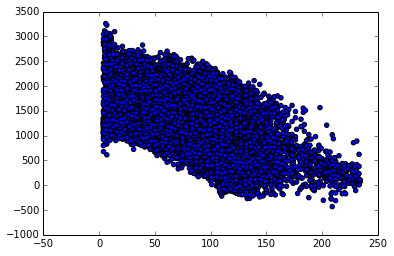

In [45]:
plt.scatter(flood_mask, evi_mask)

In [46]:
np.corrcoef(flood_mask, evi_mask)

array([[ 1.        , -0.59298629],
       [-0.59298629,  1.        ]])

In [59]:
np.array([flood_mask.sum()])

array([ 24368.], dtype=float32)

In [60]:
np.vstack([flood_sum, np.array([flood_mask.sum()])])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [61]:
flood_sum

array([], dtype=float64)

In [74]:
j = ids[0]
flood_mask = flood_array[np.where((county_array == j) & (crop_array == 5) & (flood_array > 10))]
print flood_mask

[]


In [66]:
np.vstack([flood_sum, np.array([flood_mask.sum()])])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [79]:
flood_array[np.where((county_array == 138) & (crop_array == 5) & (flood_array > 10))]

array([  19.,   20.,   13.,   32.,   16.,   19.,   16.,   29.,   46.,
         11.,   17.,   22.,   27.,   27.,   55.,   15.,   25.,   19.,
         17.,   13.,   56.,   21.,   20.,   52.,   73.,   12.,   54.,
         34.,   62.,   20.,   21.,   31.,   22.,   16.,   33.,   47.,
         31.,   21.,   39.,   75.,   40.,   39.,   11.,   35.,   27.,
         19.,   20.,   34.,   56.,   70.,  102.,  171.,   39.,   57.,
         57.,  184.,   13.,   56.,   55.,   33.,   66.,   35.,   61.,
         55.,   34.,   33.,   31.,   52.,   20.,   55.,   78.,   58.,
         33.,   76.,   78.,   57.,   33.,   33.,   37.,   55.,   21.,
         38.,   37.,   35.,   53.,   53.,   52.,   33.,   36.,   34.,
         33.,   59.,   37.,   34.,   34.,   31.,   54.,   34.,   36.,
         34.,   33.,   53.,   34.,   33.,   32.,   54.,   33.,   35.,
         37.,   35.,   55.,   53.,   53.,   34.,   58.,   77.,   75.,
         74.,   72.,   34.,   74.,   53.,   53.,   33.,   52.,   53.,
         36.,   55.,

In [78]:
flood_array[county_array == 5]

array([ 29.,  38.,  47., ...,  22.,  23.,  22.], dtype=float32)